In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [42]:
data=pd.read_csv('Study_vs_Score_data.csv')

# understanding the data

In [43]:
data.shape

(1000, 2)

In [44]:
data.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [46]:
data.isnull().sum()

Attendance_Hours    0
Final_Marks         0
dtype: int64

In [47]:
data.describe()

,Attendance_Hours,Final_Marks
count,1000.000000,1000.000000
mean,44.317959,62.653458
std,20.449615,11.152260
min,10.324242,34.870813
25%,26.518129,53.755843
50%,44.776516,62.844569
75%,62.102371,71.520120
max,79.980237,91.061859


In [48]:
data.duplicated().sum()

0

In [49]:
data.corr()['Final_Marks']

Attendance_Hours    0.896564
Final_Marks         1.000000
Name: Final_Marks, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

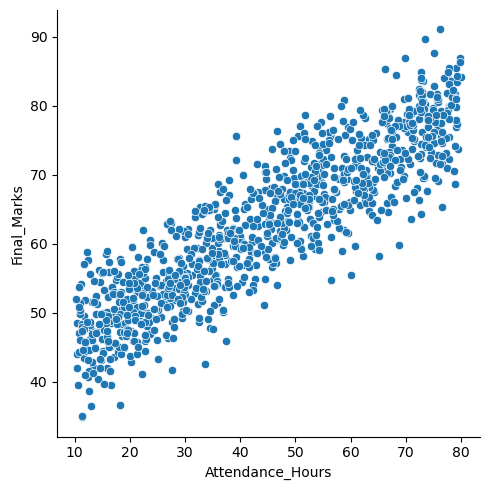

In [50]:
sns.relplot(x='Attendance_Hours',y='Final_Marks',data=data)
plt.show

# simple linear regression from scratch

In [51]:
x=data.iloc[:,0]
y=data.iloc[:,1]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [73]:
class meralr:
    def __init__(self):
        self.m=None
        self.b=None

    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):

            num=num+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
            den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))
            
        self.m=num/den
        self.b=y_train.mean()-(self.m*x_train.mean())
        
        print(self.m)
        print(self.b)

    def predict(self,x_test):
        return self.m*x_test+self.b

In [75]:
x_train.shape[0]

800

In [76]:
model=meralr()

model.fit(x_train.values,y_train.values)

0.48807278771762197
41.14816656995235


In [80]:
y_predict=model.predict(x_test.values)

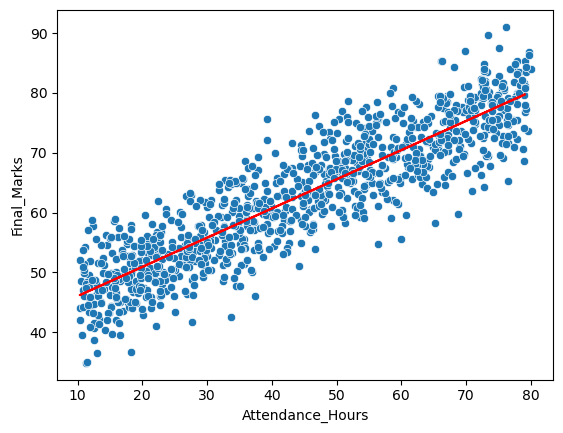

In [86]:
sns.scatterplot(x='Attendance_Hours',y='Final_Marks',data=data)
plt.plot(x_test,y_predict,color='red')
plt.show()

# Regression matrix

In [89]:
mean_absolute_error(y_test,y_predict)

3.9656044906700845

In [90]:
mean_squared_error(y_test,y_predict)

24.38121161336232

In [92]:
r2_score(y_test,y_predict)

0.807793073382109